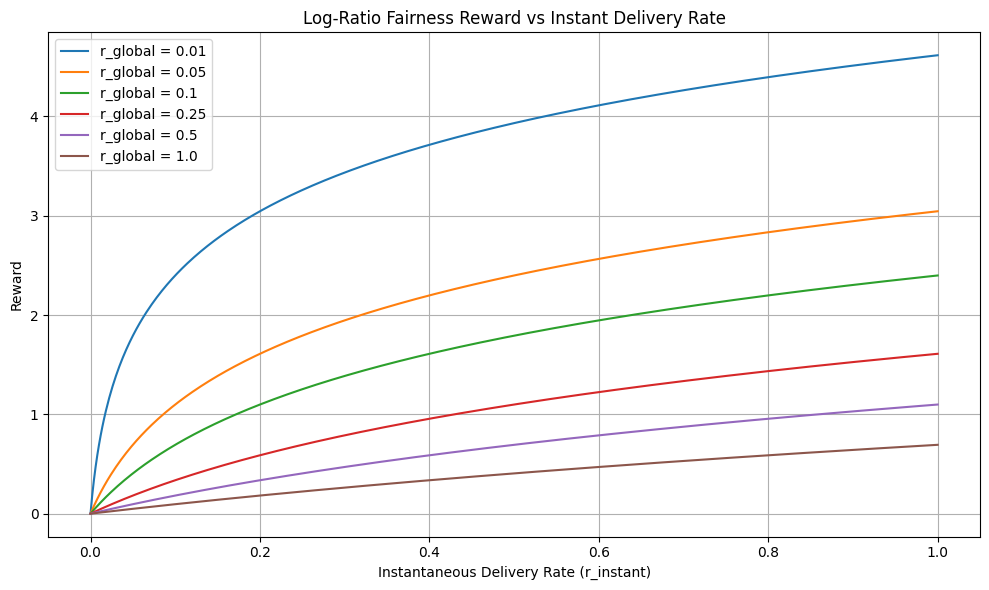

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon = 1e-6
r_instant = np.linspace(0, 1, 500)  # Simulate r_inst values between 0 and 1

# Different global EDR baselines (historical delivery levels)
r_global_values = [0.01, 0.05, 0.1, 0.25, 0.5, 1.0]

plt.figure(figsize=(10, 6))
for r_global in r_global_values:
    reward = np.log(1 + (r_instant + epsilon) / (r_global + epsilon))
    label = f"r_global = {r_global}"
    plt.plot(r_instant, reward, label=label)

plt.title("Log-Ratio Fairness Reward vs Instant Delivery Rate")
plt.xlabel("Instantaneous Delivery Rate (r_instant)")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


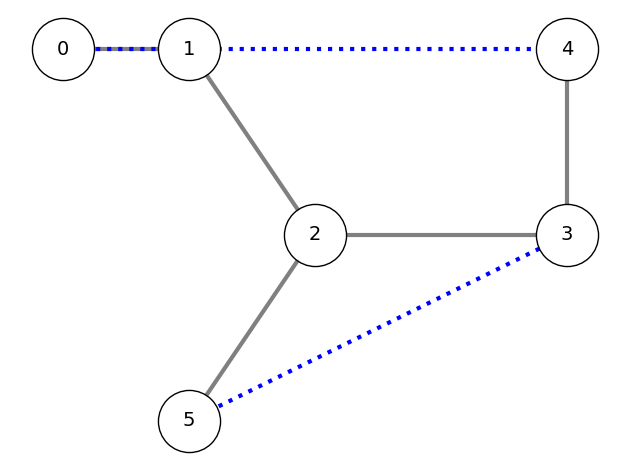

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()

# Add nodes
nodes = [0, 1, 2, 3, 4, 5]
G.add_nodes_from(nodes)

# Add solid edges (black/grey lines)
solid_edges = [(0, 1), (1, 2), (2, 3), (3, 4), (2, 5)]
G.add_edges_from(solid_edges)

# Add dotted edges (blue lines)
dotted_edges = [(0, 4), (5, 3)]

# Define the layout for a dumbbell structure
pos = {
    0: (0, 2),
    1: (1, 2),
    2: (2, 1),
    3: (4, 1),
    4: (4, 2),
    5: (1, 0),
}

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors='black', node_size=2000)

# Draw solid edges
nx.draw_networkx_edges(G, pos, edgelist=solid_edges, edge_color='grey', width=3)

# Draw dotted edges
nx.draw_networkx_edges(G, pos, edgelist=dotted_edges, style='dotted', edge_color='blue', width=3)

# Draw labels inside the nodes
nx.draw_networkx_labels(G, pos, font_color='black', font_size=14)

# Turn off the axis
plt.axis('off')
plt.tight_layout()

# Save high-resolution image
plt.savefig("network_topology.png", dpi=300)

# Show the plot
plt.show()


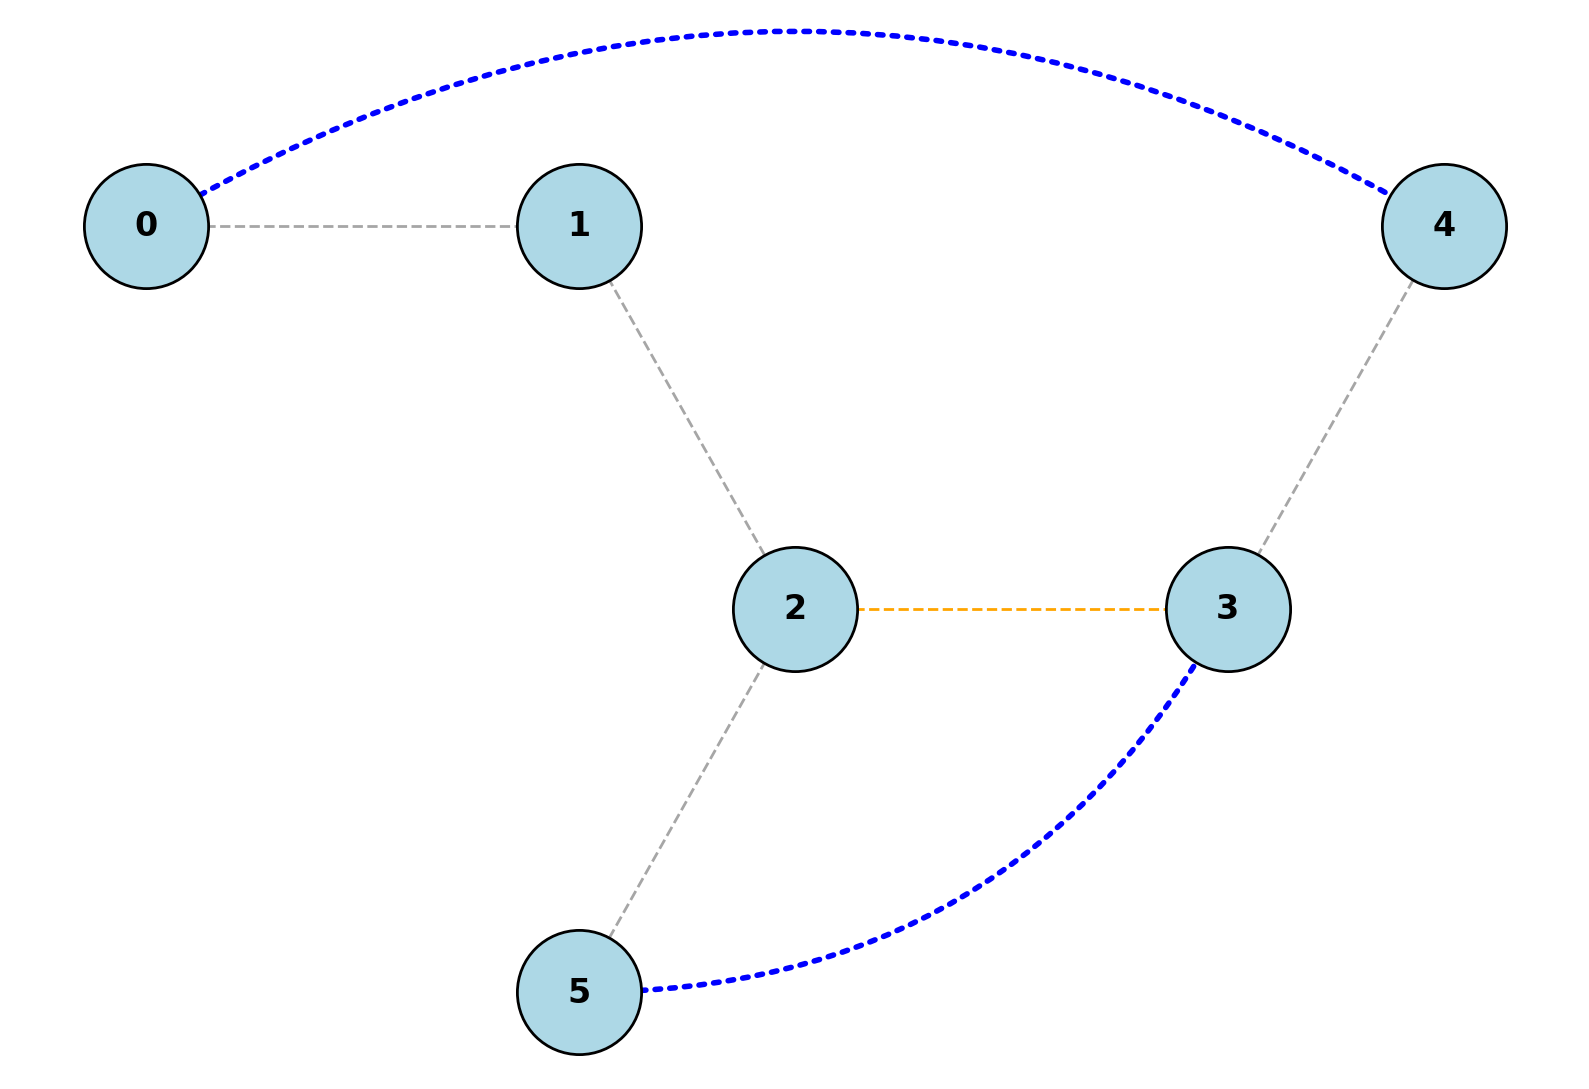

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create the graph
G = nx.Graph()

# Add nodes
nodes = [0, 1, 2, 3, 4, 5]
G.add_nodes_from(nodes)

# Add solid edges (black/grey lines)
solid_edges = [(0, 1), (1, 2), (2, 3), (3, 4), (2, 5)]
G.add_edges_from(solid_edges)

# Add dotted edges (blue lines)
dotted_edges = [(0, 4), (5, 3)]

# Define the adjusted layout with uniform horizontal distance
pos = {
    0: (1, 1.5),
    1: (3, 1.5),
    2: (4, 1),
    3: (6, 1),
    4: (7, 1.5),
    5: (3, 0.5)
}

# Start figure
plt.figure(figsize=(16, 11))
plt.clf()

# Draw base graph with grey dashed initial edges
G_viz = G.copy()
G_viz.add_edges_from(dotted_edges)

# Modify the edge (2, 3) to be orange and dashed
nx.draw_networkx_edges(G_viz, pos=pos, 
                       edgelist=[(2, 3)],
                       edge_color='orange',
                       style='dashed',
                       width=2)

# Draw remaining solid edges
nx.draw_networkx_edges(G_viz, pos=pos, 
                       edgelist=[edge for edge in solid_edges if edge != (2, 3)],
                       edge_color='grey',
                       style='dashed',
                       alpha=0.7,
                       width=2)

# Draw blue curved edges manually
ax = plt.gca()
for edge in dotted_edges:
    (x1, y1) = pos[edge[0]]
    (x2, y2) = pos[edge[1]]
    if edge == (0, 4):
        rad = -0.3  # Reduce curvature for (0, 4) to prevent clipping
    else:
        rad = 0.3  # Curve under the node for (5, 3)
    con = mpatches.FancyArrowPatch((x1, y1), (x2, y2),
                                   connectionstyle=f"arc3,rad={rad}",
                                   linestyle='dotted',
                                   color='blue',
                                   linewidth=4,
                                   arrowstyle='-')
    ax.add_patch(con)

# Draw nodes and labels
nx.draw_networkx_nodes(G_viz, pos, node_color='lightblue', edgecolors='black', node_size=8000, linewidths=2)
nx.draw_networkx_labels(G_viz, pos, font_size=24, font_weight='bold')

# Turn off the axis
plt.axis('off')
plt.tight_layout()

# Show the plot
plt.show()


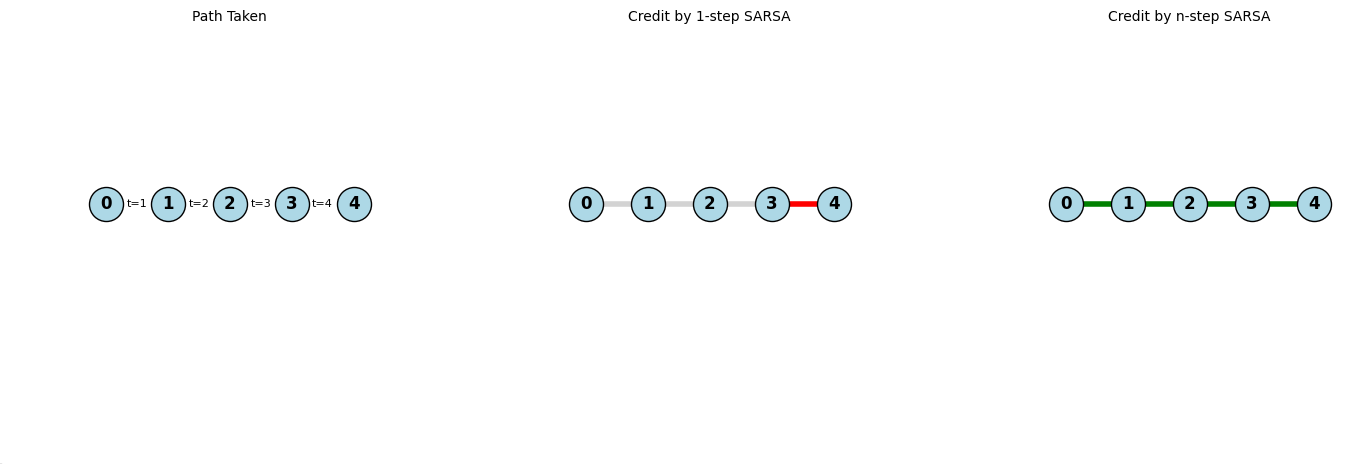

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the basic path graph
nodes = [0, 1, 2, 3, 4]
edges = [(0, 1), (1, 2), (2, 3), (3, 4)]

# Position nodes in a straight line
pos = {i: (i, 0) for i in nodes}

# Set up the figure
fig, axs = plt.subplots(1, 3, figsize=(14, 5))  # Slightly taller figure

# --- 1. Path Taken (Blue) ---
G1 = nx.Graph()
G1.add_nodes_from(nodes)
G1.add_edges_from(edges)

nx.draw_networkx_nodes(G1, pos, ax=axs[0], node_color='lightblue', edgecolors='black', node_size=600)
nx.draw_networkx_labels(G1, pos, ax=axs[0], font_size=12, font_weight='bold')
nx.draw_networkx_edges(G1, pos, edgelist=edges, ax=axs[0], edge_color='blue', width=4)

# Proper edge labels directly on the edges
edge_labels = {(edges[i][0], edges[i][1]): f"t={i+1}" for i in range(len(edges))}
nx.draw_networkx_edge_labels(G1, pos=pos, edge_labels=edge_labels, ax=axs[0], font_size=8, label_pos=0.5)

axs[0].set_title("Path Taken", fontsize=10, pad=6)
axs[0].axis('off')

# --- 2. Credit by 1-step SARSA (Red at the end) ---
G2 = nx.Graph()
G2.add_nodes_from(nodes)
G2.add_edges_from(edges)

edge_colors = ['lightgray'] * 3 + ['red']

nx.draw_networkx_nodes(G2, pos, ax=axs[1], node_color='lightblue', edgecolors='black', node_size=600)
nx.draw_networkx_labels(G2, pos, ax=axs[1], font_size=12, font_weight='bold')
nx.draw_networkx_edges(G2, pos, edgelist=edges, ax=axs[1], edge_color=edge_colors, width=4)

axs[1].set_title("Credit by 1-step SARSA", fontsize=10, pad=6)
axs[1].axis('off')

# --- 3. Credit by n-step SARSA (All Green) ---
G3 = nx.Graph()
G3.add_nodes_from(nodes)
G3.add_edges_from(edges)

nx.draw_networkx_nodes(G3, pos, ax=axs[2], node_color='lightblue', edgecolors='black', node_size=600)
nx.draw_networkx_labels(G3, pos, ax=axs[2], font_size=12, font_weight='bold')
nx.draw_networkx_edges(G3, pos=pos, edgelist=edges, ax=axs[2], edge_color='green', width=4)

axs[2].set_title("Credit by n-step SARSA", fontsize=10, pad=6)
axs[2].axis('off')

# --- Draw thin vertical separator lines ---
fig.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.15, wspace=0.6)
for xpos in [1/3, 2/3]:
    fig.lines.append(plt.Line2D([xpos, xpos], [0.1, 0.9], color='lightgray', linewidth=1, linestyle='--'))

plt.show()



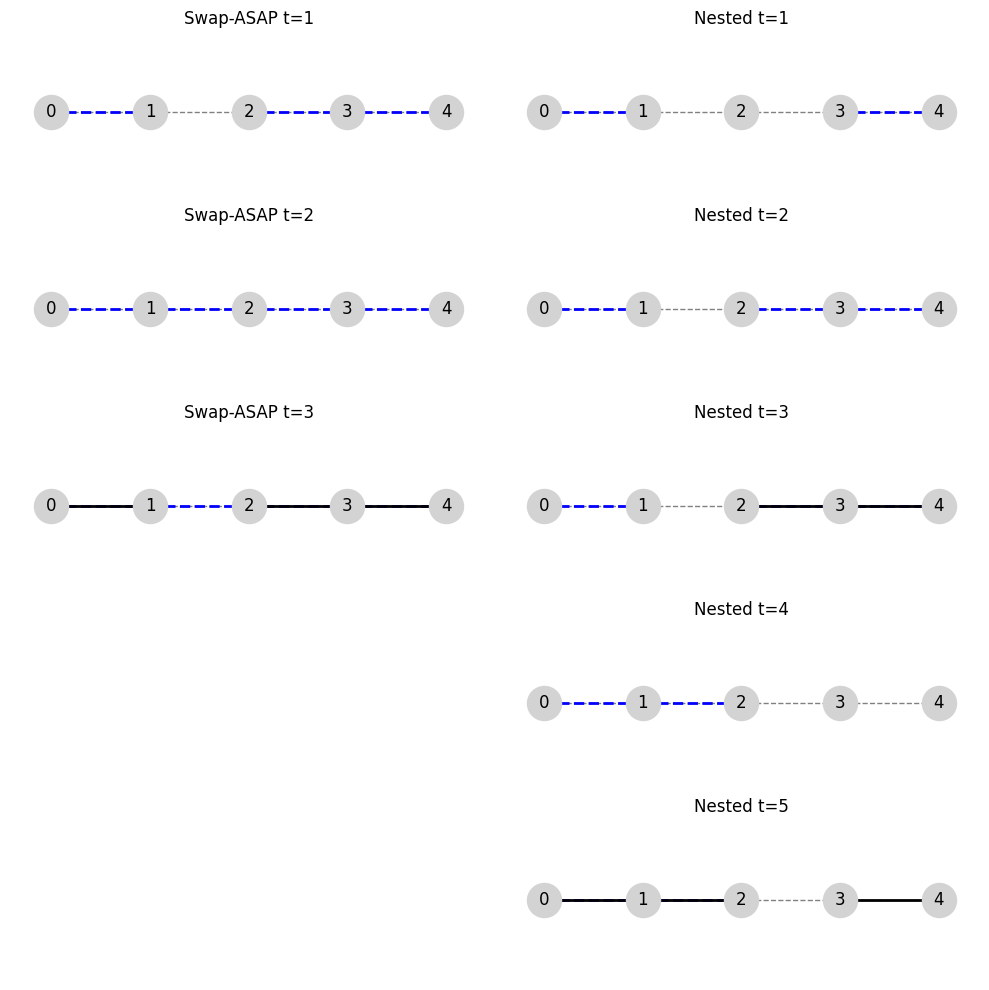

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Fixed hard links
hard_links = [(0,1), (1,2), (2,3), (3,4)]

# Define events per timestep
# New entanglements added, swaps done
swap_asap_steps = [
    {'new_entangle': [(0,1), (2,3), (3,4)], 'swap': []},
    {'new_entangle': [(1,2)], 'swap': []},
    {'new_entangle': [], 'swap': [(0,1), (2,3), (3,4)]},  # swap uses entanglements
]

nested_steps = [
    {'new_entangle': [(0,1), (3,4)], 'swap': []},
    {'new_entangle': [(2,3)], 'swap': []},
    {'new_entangle': [], 'swap': [(2,3), (3,4)]},
    {'new_entangle': [(1,2)], 'swap': []},
    {'new_entangle': [], 'swap': [(0,1), (1,2), (3,4)]},
]

# Layout
pos = {i: (i, 0) for i in range(5)}

fig, axes = plt.subplots(max(len(swap_asap_steps), len(nested_steps)), 2, figsize=(10,10), squeeze=False)

def draw_network(ax, hard_links, active_entangles, swaps, title):
    G = nx.Graph()
    G.add_nodes_from(range(5))
    G.add_edges_from(hard_links)

    # Draw hard links (gray dashed)
    nx.draw_networkx_edges(G, pos, edgelist=hard_links, ax=ax, style='dashed', edge_color='gray')

    # Draw persistent entanglements (blue dashed)
    if active_entangles:
        nx.draw_networkx_edges(G, pos, edgelist=active_entangles, ax=ax, style='dashed', edge_color='blue', width=2)

    # Draw swaps (solid black)
    if swaps:
        nx.draw_networkx_edges(G, pos, edgelist=swaps, ax=ax, style='solid', edge_color='black', width=2)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightgray', node_size=600)
    nx.draw_networkx_labels(G, pos, ax=ax)

    ax.set_title(title)
    ax.set_axis_off()

# Track active entanglements
active_entangles_swap_asap = []
active_entangles_nested = []

# Go over each timestep
for t in range(max(len(swap_asap_steps), len(nested_steps))):
    if t < len(swap_asap_steps):
        step = swap_asap_steps[t]
        # Add new entanglements
        active_entangles_swap_asap += step['new_entangle']
        # Draw
        draw_network(axes[t, 0], hard_links, active_entangles_swap_asap, step['swap'], f'Swap-ASAP t={t+1}')
        # After swap, consume the entanglements involved
        for u,v in step['swap']:
            if (u,v) in active_entangles_swap_asap:
                active_entangles_swap_asap.remove((u,v))
            elif (v,u) in active_entangles_swap_asap:
                active_entangles_swap_asap.remove((v,u))

    else:
        axes[t,0].axis('off')

    if t < len(nested_steps):
        step = nested_steps[t]
        # Add new entanglements
        active_entangles_nested += step['new_entangle']
        # Draw
        draw_network(axes[t, 1], hard_links, active_entangles_nested, step['swap'], f'Nested t={t+1}')
        # After swap, consume the entanglements involved
        for u,v in step['swap']:
            if (u,v) in active_entangles_nested:
                active_entangles_nested.remove((u,v))
            elif (v,u) in active_entangles_nested:
                active_entangles_nested.remove((v,u))
    else:
        axes[t,1].axis('off')

# Titles
axes[0,0].set_ylabel('Swap-ASAP', fontsize=14)
axes[0,1].set_ylabel('Nested', fontsize=14)

plt.tight_layout()
plt.show()


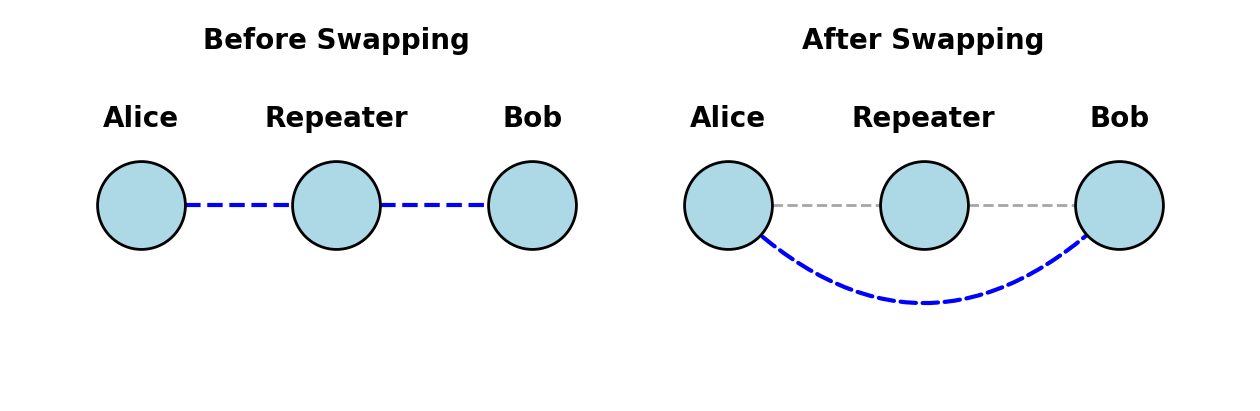

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create figure: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Define nodes
nodes = ['Alice', 'Repeater', 'Bob']
edges_hard = [('Alice', 'Repeater'), ('Repeater', 'Bob')]  # Physical links
edges_entangled_before = [('Alice', 'Repeater'), ('Repeater', 'Bob')]  # Entanglements before swapping
edges_swapped = [('Alice', 'Bob')]  # After swap

# Positions
pos = {
    'Alice': (0, 0),
    'Repeater': (1.5, 0),
    'Bob': (3, 0)
}

# Common settings
label_offset = 0.6
xlim = (-1, 4)
ylim = (-1.5, 1.5)

# --- Plot 1: Before Swapping ---
G_before = nx.Graph()
G_before.add_nodes_from(nodes)
G_before.add_edges_from(edges_entangled_before)

# Draw nodes
nx.draw_networkx_nodes(G_before, pos, ax=axs[0],
                       node_color='lightblue', edgecolors='black', node_size=4000, linewidths=2)

# Labels above nodes
for node, (x, y) in pos.items():
    axs[0].text(x, y + label_offset, node, fontsize=20, fontweight='bold', ha='center')

# Draw blue dashed entanglements
nx.draw_networkx_edges(G_before, pos, edgelist=edges_entangled_before, ax=axs[0],
                       edge_color='blue', style='dashed', width=3)

axs[0].axis('off')
axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)
axs[0].set_aspect('equal')

# --- Plot 2: After Swapping ---
G_after = nx.Graph()
G_after.add_nodes_from(nodes)
G_after.add_edges_from(edges_hard)

# Draw nodes
nx.draw_networkx_nodes(G_after, pos, ax=axs[1],
                       node_color='lightblue', edgecolors='black', node_size=4000, linewidths=2)

# Labels above nodes
for node, (x, y) in pos.items():
    axs[1].text(x, y + label_offset, node, fontsize=20, fontweight='bold', ha='center')

# Draw hard physical links (grey dashed)
nx.draw_networkx_edges(G_after, pos, edgelist=edges_hard, ax=axs[1],
                       edge_color='grey', style='dashed', alpha=0.7, width=2)

# Draw new swapped entanglement as curved blue dashed arc
ax = axs[1]
(x1, y1) = pos['Alice']
(x2, y2) = pos['Bob']
con = mpatches.FancyArrowPatch((x1, y1), (x2, y2),
                               connectionstyle="arc3,rad=0.5",  # curve underneath nicely
                               linestyle='dashed',
                               color='blue',
                               linewidth=3,
                               arrowstyle='-')
ax.add_patch(con)

axs[1].axis('off')
axs[1].set_xlim(xlim)
axs[1].set_ylim(ylim)
axs[1].set_aspect('equal')


# Titles manually positioned
axs[0].text(1.5, 1.2, "Before Swapping", fontsize=20, fontweight='bold', ha='center')
axs[1].text(1.5, 1.2, "After Swapping", fontsize=20, fontweight='bold', ha='center')

# --- Adjust layout
plt.subplots_adjust(wspace=-0.1)
plt.show()


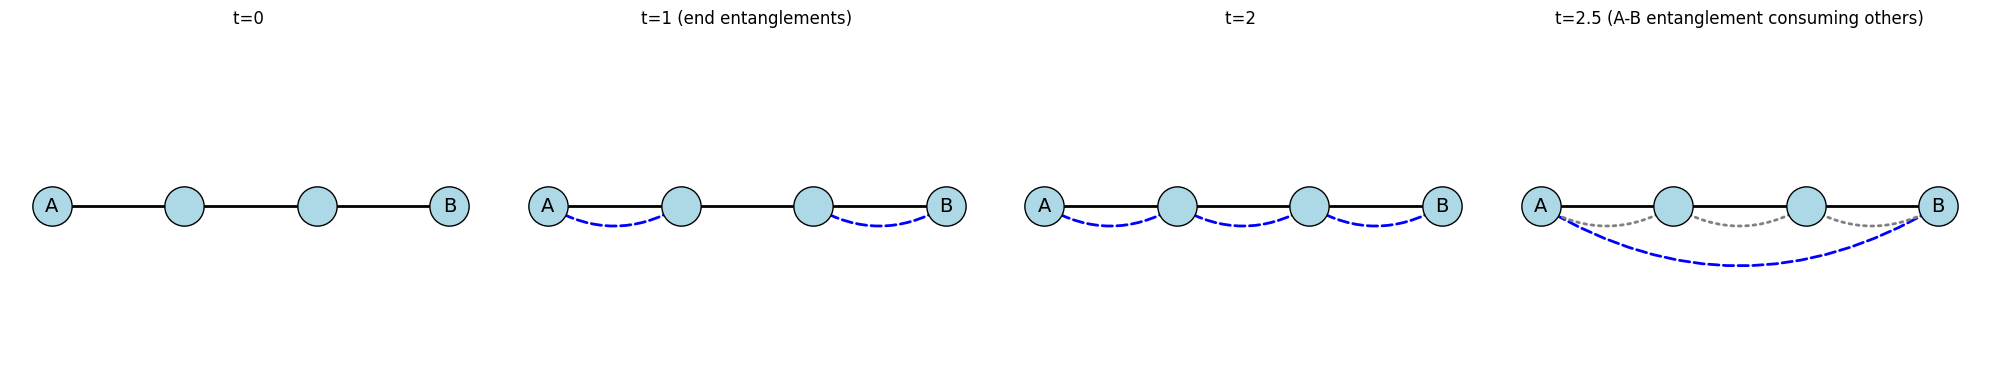

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import FancyArrowPatch

# Define node positions to keep them aligned
pos = {
    0: (0, 0),
    1: (1, 0),
    2: (2, 0),
    3: (3, 0)
}

# Helper function to draw curved edges
def draw_curved_edge(ax, p1, p2, style, color, rad=0.2):
    arrow = FancyArrowPatch(
        posA=p1, posB=p2,
        connectionstyle=f"arc3,rad={rad}",
        arrowstyle="-",
        linestyle=style,
        color=color,
        linewidth=2
    )
    ax.add_patch(arrow)

# Draw function
def draw_network(timestep, hard_links=[], entangled_links=[], consumed_links=[], title_suffix=""):
    G = nx.Graph()
    G.add_nodes_from(pos.keys())

    plt.figure(figsize=(8, 2))
    ax = plt.gca()

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800, edgecolors='black')

    # Draw hard links (straight lines)
    if hard_links:
        nx.draw_networkx_edges(
            G, pos, edgelist=hard_links,
            style='solid', edge_color='black', width=2
        )

    # Draw entangled links (curved dashed blue)
    for (u, v) in entangled_links:
        draw_curved_edge(ax, pos[u], pos[v], style="dashed", color="blue", rad=0.3)

    # Draw consumed links (curved dotted gray)
    for (u, v) in consumed_links:
        draw_curved_edge(ax, pos[u], pos[v], style="dotted", color="gray", rad=0.3)

    # Label nodes
    labels = {0: "A", 1: "", 2: "", 3: "B"}
    nx.draw_networkx_labels(G, pos, labels, font_size=14)

    plt.title(f"t={timestep} {title_suffix}")
    plt.axis('off')
    plt.show()

# t=0: Initial hard links, no entanglements
draw_network(
    timestep=0,
    hard_links=[(0,1), (1,2), (2,3)]
)

# t=1: Entanglements only on edges (0,1) and (2,3)
draw_network(
    timestep=1,
    hard_links=[(0,1), (1,2), (2,3)],
    entangled_links=[(0,1), (2,3)],
    title_suffix="(end entanglements)"
)

# t=2: Entanglements everywhere
draw_network(
    timestep=2,
    hard_links=[(0,1), (1,2), (2,3)],
    entangled_links=[(0,1), (1,2), (2,3)]
)

# t=2.5: A-B entanglement consuming all others
draw_network(
    timestep=2.5,
    hard_links=[(0,1), (1,2), (2,3)],
    entangled_links=[(0,3)],
    consumed_links=[(0,1), (1,2), (2,3)],
    title_suffix="(A-B entanglement consuming others)"
)


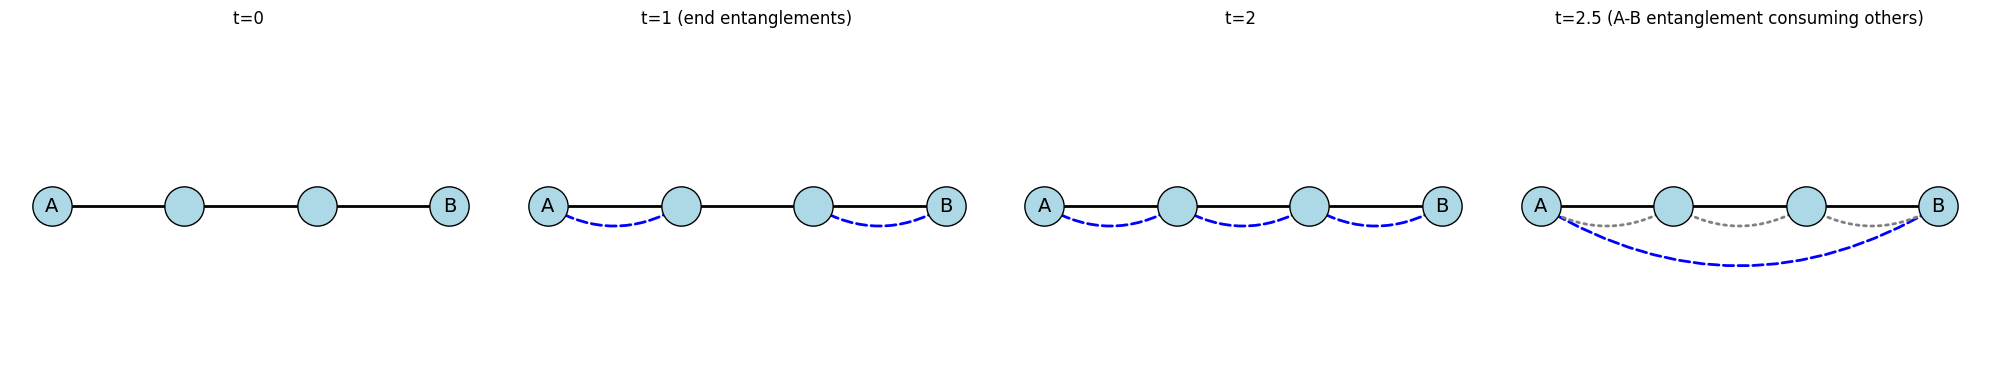

In [54]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import FancyArrowPatch

# Define node positions to keep them aligned
pos = {
    0: (0, 0),
    1: (1, 0),
    2: (2, 0),
    3: (3, 0)
}

# Helper function to draw curved edges
def draw_curved_edge(ax, p1, p2, style, color, rad=0.2):
    arrow = FancyArrowPatch(
        posA=p1, posB=p2,
        connectionstyle=f"arc3,rad={rad}",
        arrowstyle="-",
        linestyle=style,
        color=color,
        linewidth=2
    )
    ax.add_patch(arrow)

# Draw function
def draw_network(ax, timestep, hard_links=[], entangled_links=[], consumed_links=[], title_suffix=""):
    G = nx.Graph()
    G.add_nodes_from(pos.keys())

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800, edgecolors='black', ax=ax)

    # Draw hard links (straight lines)
    if hard_links:
        nx.draw_networkx_edges(
            G, pos, edgelist=hard_links,
            style='solid', edge_color='black', width=2, ax=ax
        )

    # Draw entangled links (curved dashed blue)
    for (u, v) in entangled_links:
        draw_curved_edge(ax, pos[u], pos[v], style="dashed", color="blue", rad=0.3)

    # Draw consumed links (curved dotted gray)
    for (u, v) in consumed_links:
        draw_curved_edge(ax, pos[u], pos[v], style="dotted", color="gray", rad=0.3)

    # Label nodes
    labels = {0: "A", 1: "", 2: "", 3: "B"}
    nx.draw_networkx_labels(G, pos, labels, font_size=14, ax=ax)

    ax.set_title(f"t={timestep} {title_suffix}")
    ax.axis('off')

# Create a single plot with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# t=0: Initial hard links, no entanglements
draw_network(
    axes[0],
    timestep=0,
    hard_links=[(0,1), (1,2), (2,3)]
)

# t=1: Entanglements only on edges (0,1) and (2,3)
draw_network(
    axes[1],
    timestep=1,
    hard_links=[(0,1), (1,2), (2,3)],
    entangled_links=[(0,1), (2,3)],
    title_suffix="(end entanglements)"
)

# t=2: Entanglements everywhere (no consumed links)
draw_network(
    axes[2],
    timestep=2,
    hard_links=[(0,1), (1,2), (2,3)],
    entangled_links=[(0,1), (1,2), (2,3)]
)

# t=2.5: A-B entanglement consuming all others
# Consumed links shown in gray

draw_network(
    axes[3],
    timestep=2.5,
    hard_links=[(0,1), (1,2), (2,3)],
    entangled_links=[(0,3)],
    consumed_links=[(0,1), (1,2), (2,3)],
    title_suffix="(A-B entanglement consuming others)"
)

plt.tight_layout()
plt.show()


/var/folders/gg/2xgfrwhs60j8qg5zm5gbky_c0000gn/T/ipykernel_48565/1389742027.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.5)


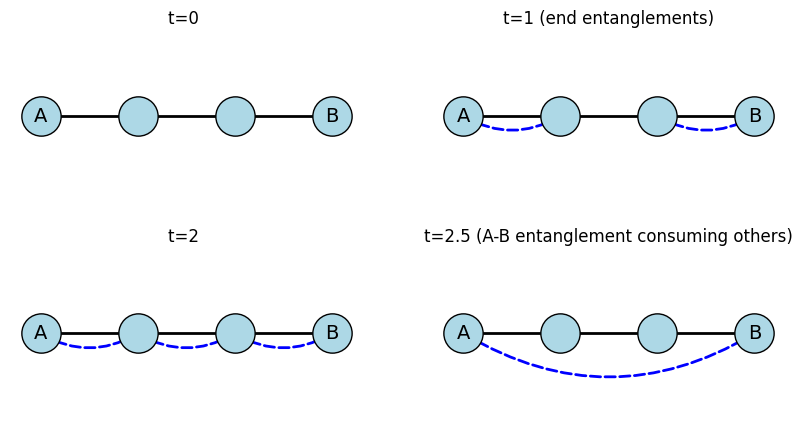

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import FancyArrowPatch

# Define node positions to keep them aligned
pos = {
    0: (0, 0),
    1: (1, 0),
    2: (2, 0),
    3: (3, 0)
}

# Helper function to draw curved edges
def draw_curved_edge(ax, p1, p2, style, color, rad=0.2):
    arrow = FancyArrowPatch(
        posA=p1, posB=p2,
        connectionstyle=f"arc3,rad={rad}",
        arrowstyle="-",
        linestyle=style,
        color=color,
        linewidth=2
    )
    ax.add_patch(arrow)

# Draw function
def draw_network(ax, timestep, hard_links=[], entangled_links=[], title_suffix=""):
    G = nx.Graph()
    G.add_nodes_from(pos.keys())

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800, edgecolors='black', ax=ax)

    # Draw hard links (straight lines)
    if hard_links:
        nx.draw_networkx_edges(
            G, pos, edgelist=hard_links,
            style='solid', edge_color='black', width=2, ax=ax
        )

    # Draw entangled links (curved dashed blue)
    for (u, v) in entangled_links:
        draw_curved_edge(ax, pos[u], pos[v], style="dashed", color="blue", rad=0.3)

    # Label nodes
    labels = {0: "A", 1: "", 2: "", 3: "B"}
    nx.draw_networkx_labels(G, pos, labels, font_size=14, ax=ax)

    ax.set_title(f"t={timestep} {title_suffix}")
    ax.axis('off')

# Create a single plot with 2x2 subplots, adjusted spacing
fig, axes = plt.subplots(2, 2, figsize=(10, 5), gridspec_kw={'hspace': 0.3})

# Flatten axes array for easy indexing
axes = axes.flatten()

# t=0: Initial hard links, no entanglements
draw_network(
    axes[0],
    timestep=0,
    hard_links=[(0,1), (1,2), (2,3)]
)

# t=1: Entanglements only on edges (0,1) and (2,3)
draw_network(
    axes[1],
    timestep=1,
    hard_links=[(0,1), (1,2), (2,3)],
    entangled_links=[(0,1), (2,3)],
    title_suffix="(end entanglements)"
)

# t=2: Entanglements everywhere (no consumed links)
draw_network(
    axes[2],
    timestep=2,
    hard_links=[(0,1), (1,2), (2,3)],
    entangled_links=[(0,1), (1,2), (2,3)]
)

# t=2.5: A-B entanglement consuming all others
# No consumed links shown now

draw_network(
    axes[3],
    timestep=2.5,
    hard_links=[(0,1), (1,2), (2,3)],
    entangled_links=[(0,3)],
    title_suffix="(A-B entanglement consuming others)"
)

plt.tight_layout(pad=0.5)
plt.show()


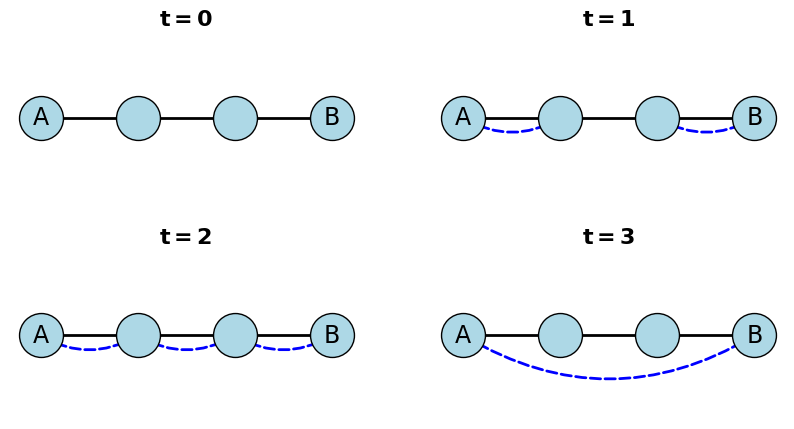

In [64]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import FancyArrowPatch

# Define node positions to keep them aligned
pos = {
    0: (0, 0),
    1: (1, 0),
    2: (2, 0),
    3: (3, 0)
}

# Helper function to draw curved edges
def draw_curved_edge(ax, p1, p2, style, color, rad=0.2):
    arrow = FancyArrowPatch(
        posA=p1, posB=p2,
        connectionstyle=f"arc3,rad={rad}",
        arrowstyle="-",
        linestyle=style,
        color=color,
        linewidth=2
    )
    ax.add_patch(arrow)

# Draw function
def draw_network(ax, timestep, hard_links=[], entangled_links=[]):
    G = nx.Graph()
    G.add_nodes_from(pos.keys())

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, edgecolors='black', ax=ax)

    # Draw hard links (straight lines)
    if hard_links:
        nx.draw_networkx_edges(
            G, pos, edgelist=hard_links,
            style='solid', edge_color='black', width=2, ax=ax
        )

    # Draw entangled links (curved dashed blue)
    for (u, v) in entangled_links:
        draw_curved_edge(ax, pos[u], pos[v], style="dashed", color="blue", rad=0.3)

    # Label nodes
    labels = {0: "A", 1: "", 2: "", 3: "B"}
    nx.draw_networkx_labels(G, pos, labels, font_size=17, ax=ax)

    ax.set_title(f"$\\mathbf{{t={timestep}}}$", fontsize=16)
    ax.axis('off')

# Create a single plot with 2x2 subplots, adjusted spacing
fig, axes = plt.subplots(2, 2, figsize=(10, 5), gridspec_kw={'hspace': 0.3})

# Flatten axes array for easy indexing
axes = axes.flatten()

# t=0: Initial hard links, no entanglements
draw_network(
    axes[0],
    timestep=0,
    hard_links=[(0,1), (1,2), (2,3)]
)

# t=1: Entanglements only on edges (0,1) and (2,3)
draw_network(
    axes[1],
    timestep=1,
    hard_links=[(0,1), (1,2), (2,3)],
    entangled_links=[(0,1), (2,3)]
)

# t=2: Entanglements everywhere (no consumed links)
draw_network(
    axes[2],
    timestep=2,
    hard_links=[(0,1), (1,2), (2,3)],
    entangled_links=[(0,1), (1,2), (2,3)]
)

# t=2.5: A-B entanglement consuming all others
# No consumed links shown now
draw_network(
    axes[3],
    timestep=3,
    hard_links=[(0,1), (1,2), (2,3)],
    entangled_links=[(0,3)]
)

plt.show()

    

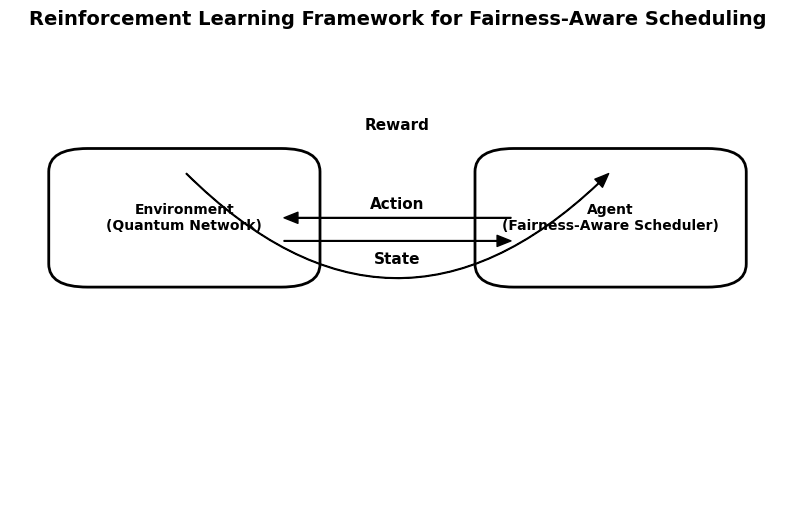

In [69]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, FancyBboxPatch

def draw_agent_environment_loop_final():
    fig, ax = plt.subplots(figsize=(10, 6))

    # Draw boxes
    agent_box = FancyBboxPatch(
        (0.65, 0.5), 0.25, 0.2,
        boxstyle="round,pad=0.05",
        edgecolor="black", facecolor="white", linewidth=2
    )
    env_box = FancyBboxPatch(
        (0.1, 0.5), 0.25, 0.2,
        boxstyle="round,pad=0.05",
        edgecolor="black", facecolor="white", linewidth=2
    )
    ax.add_patch(agent_box)
    ax.add_patch(env_box)

    # Add text inside boxes
    ax.text(0.775, 0.6, "Agent\n(Fairness-Aware Scheduler)", ha="center", va="center", fontsize=10, fontweight="bold")
    ax.text(0.225, 0.6, "Environment\n(Quantum Network)", ha="center", va="center", fontsize=10, fontweight="bold")

    # Draw arrows
    style = "Simple,tail_width=0.5,head_width=8,head_length=10"
    # Action arrow (Agent -> Env)
    arrow1 = FancyArrowPatch((0.65, 0.6), (0.35, 0.6), connectionstyle="arc3,rad=0.0",
                              arrowstyle=style, color="black")
    # State arrow (Env -> Agent)
    arrow2 = FancyArrowPatch((0.35, 0.55), (0.65, 0.55), connectionstyle="arc3,rad=0.0",
                              arrowstyle=style, color="black")
    # Reward arrow (Env -> Agent, top curve)
    arrow3 = FancyArrowPatch((0.225, 0.7), (0.775, 0.7), connectionstyle="arc3,rad=0.5",
                              arrowstyle=style, color="black")

    ax.add_patch(arrow1)
    ax.add_patch(arrow2)
    ax.add_patch(arrow3)

    # Add labels on arrows
    ax.text(0.5, 0.63, "Action", ha="center", va="center", fontsize=11, fontweight="bold")
    ax.text(0.5, 0.51, "State", ha="center", va="center", fontsize=11, fontweight="bold")
    ax.text(0.5, 0.8, "Reward", ha="center", va="center", fontsize=11, fontweight="bold")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.title("Reinforcement Learning Framework for Fairness-Aware Scheduling", fontsize=14, fontweight='bold')
    plt.show()

draw_agent_environment_loop_final()


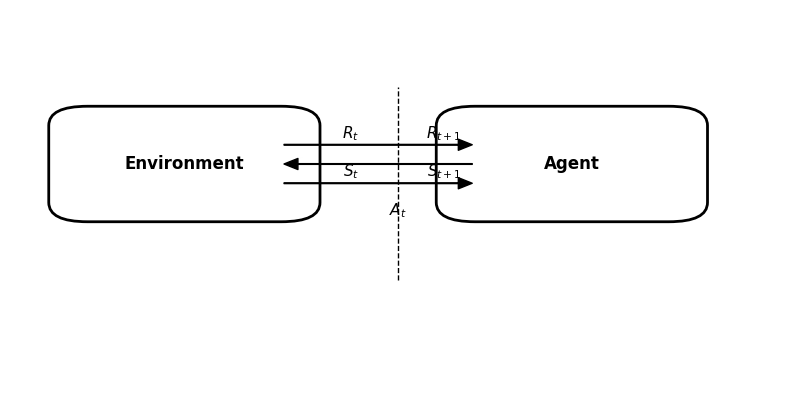

In [73]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, FancyBboxPatch

def draw_final_clean_rl_diagram():
    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw boxes: horizontally aligned
    agent_box = FancyBboxPatch((0.6, 0.5), 0.25, 0.2,
                                boxstyle="round,pad=0.05",
                                edgecolor="black", facecolor="white", linewidth=2)
    env_box = FancyBboxPatch((0.1, 0.5), 0.25, 0.2,
                              boxstyle="round,pad=0.05",
                              edgecolor="black", facecolor="white", linewidth=2)
    ax.add_patch(agent_box)
    ax.add_patch(env_box)

    # Add text inside boxes
    ax.text(0.725, 0.6, "Agent", ha="center", va="center", fontsize=12, fontweight="bold")
    ax.text(0.225, 0.6, "Environment", ha="center", va="center", fontsize=12, fontweight="bold")

    # Draw arrows
    style = "Simple,tail_width=0.5,head_width=8,head_length=10"

    # Action: Agent --> Env
    arrow1 = FancyArrowPatch((0.6, 0.6), (0.35, 0.6), connectionstyle="arc3,rad=0",
                              arrowstyle=style, color="black")
    # State: Env --> Agent
    arrow2 = FancyArrowPatch((0.35, 0.55), (0.6, 0.55), connectionstyle="arc3,rad=0",
                              arrowstyle=style, color="black")
    # Reward: Env --> Agent (above state)
    arrow3 = FancyArrowPatch((0.35, 0.65), (0.6, 0.65), connectionstyle="arc3,rad=0",
                              arrowstyle=style, color="black")

    ax.add_patch(arrow1)
    ax.add_patch(arrow2)
    ax.add_patch(arrow3)

    # Dashed vertical line (time separator)
    plt.plot([0.5, 0.5], [0.3, 0.8], 'k--', linewidth=1)

    # Add labels on arrows (split left/right of dashed line)
    ax.text(0.44, 0.68, r"$R_t$", ha="center", va="center", fontsize=11)
    ax.text(0.56, 0.68, r"$R_{t+1}$", ha="center", va="center", fontsize=11)

    ax.text(0.44, 0.58, r"$S_t$", ha="center", va="center", fontsize=11)
    ax.text(0.56, 0.58, r"$S_{t+1}$", ha="center", va="center", fontsize=11)

    ax.text(0.5, 0.48, r"$A_t$", ha="center", va="center", fontsize=11)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.show()

draw_final_clean_rl_diagram()
